48.83755813670336


c:\Users\usuario\anaconda3\envs\env_ai\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


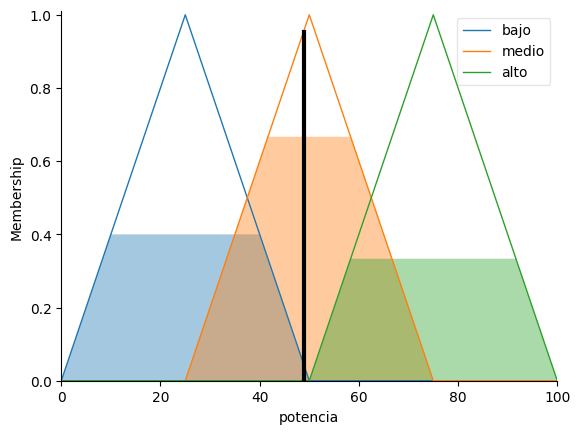

In [1]:
# pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Definir las variables del universo y las funciones de membresía
temperatura = ctrl.Antecedent(np.arange(18, 31, 1), 'temperatura')
diferencia_temp = ctrl.Antecedent(np.arange(-10, 11, 1), 'diferencia_temp')
potencia = ctrl.Consequent(np.arange(0, 101, 1), 'potencia')

# Población de las funciones de membresía
temperatura.automf(3, names=['baja', 'ideal', 'alta'])
diferencia_temp.automf(3, names=['pequeña', 'media', 'grande'])

potencia['bajo'] = fuzz.trimf(potencia.universe, [0, 25, 50])
potencia['medio'] = fuzz.trimf(potencia.universe, [25, 50, 75])
potencia['alto'] = fuzz.trimf(potencia.universe, [50, 75, 100])

# Reglas de lógica difusa
regla1 = ctrl.Rule(temperatura['baja'] | diferencia_temp['pequeña'], potencia['bajo'])
regla2 = ctrl.Rule(temperatura['ideal'], potencia['medio'])
regla3 = ctrl.Rule(temperatura['alta'] | diferencia_temp['grande'], potencia['alto'])

# Sistema de control y simulación
sistema_control = ctrl.ControlSystem([regla1, regla2, regla3])
sistema_simulacion = ctrl.ControlSystemSimulation(sistema_control)

# Entradas: temperatura actual y la diferencia de temperatura deseada
sistema_simulacion.input['temperatura'] = 26  # Temperatura actual
sistema_simulacion.input['diferencia_temp'] = -4  # Diferencia con la temperatura deseada

# Computar el resultado
sistema_simulacion.compute()
print(sistema_simulacion.output['potencia'])

# Puedes descomentar la siguiente línea para ver el gráfico del resultado
from time import sleep

potencia.view(sim=sistema_simulacion)
